In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd

In [2]:
FOLDER = 'E:/diss/reuters/'
GRAPHS = 'C:/Users/Mr Barrett/Dropbox/Diss/graphs/'

In [3]:
name_update = {
    'bert-init_state=bert-base-uncased,comp=L2R,chunking=2,max_len_comp=64': 'BERT-L2R',
    'bert-init_state=bert-base-uncased,comp=L2R,chunking=4,max_len_comp=128': 'BERT-L2R-2',
    'bert-init_state=bert-base-uncased,comp=cutting-sort,chunking=2,blocking=8,max_len_comp=64': 'BERT-Cut-Sort',
    'bert-init_state=bert-base-uncased,comp=cutting-sort,chunking=4,blocking=16,max_len_comp=128': 'BERT-Cut-Sort-2',
}

In [30]:
df = pd.read_csv(FOLDER + "reuters_normality_idempotency.csv")
df["compname"] = df["compname"].apply(lambda s: name_update[s] if s in name_update else s)
df = df.sort_values("compname")
df

,compname,CxxOverCx
5,BERT-Cut-Sort,1.501854
7,BERT-Cut-Sort-2,1.711995
4,BERT-L2R,1.675009
6,BERT-L2R-2,1.763719
0,bzip2,0.999537
1,gzip,1.000000
2,lzma,1.000000
3,zlib,1.000000


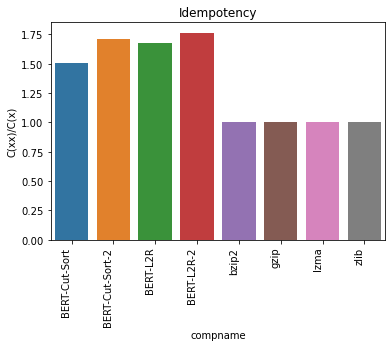

In [31]:
sns.barplot(data=df, x="compname", y="CxxOverCx")
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right')
plt.title("Idempotency")
plt.ylabel("C(xx)/C(x)")
plt.savefig(GRAPHS + f"reuters-normality-idempotency.svg", format="svg", bbox_inches='tight')
plt.show()

In [32]:
df = pd.read_csv(FOLDER + "reuters_normality_symmetry.csv")
df["compname"] = df["compname"].apply(lambda s: name_update[s] if s in name_update else s)
df = df.sort_values("compname")
df

,compname,CxyOverCyx
5,BERT-Cut-Sort,1.023263
7,BERT-Cut-Sort-2,1.026672
4,BERT-L2R,1.019875
6,BERT-L2R-2,1.024914
0,bzip2,1.007980
1,gzip,1.003247
2,lzma,1.007489
3,zlib,1.003341


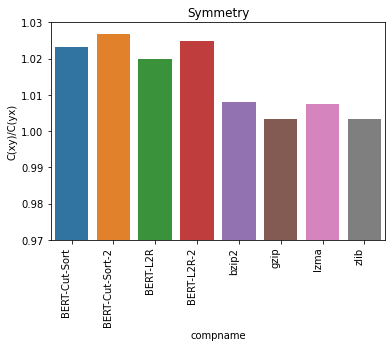

In [33]:
sns.barplot(data=df, x="compname", y="CxyOverCyx")
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right')
plt.ylim((0.97, 1.03))
plt.title("Symmetry")
plt.ylabel("C(xy)/C(yx)")
plt.savefig(GRAPHS + f"reuters-normality-symmetry.svg", format="svg", bbox_inches='tight')
plt.show()